In [18]:
import pandas as pd
import seaborn as sns

In [19]:
DATA_PATH = 'creditcard.csv'
data = pd.read_csv(DATA_PATH)

In [36]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
data.dropna(inplace=True)
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

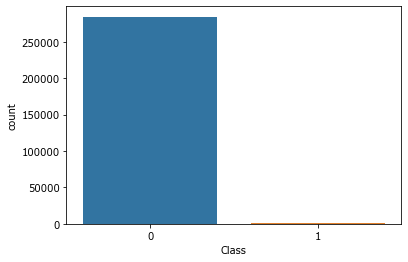

In [50]:
# sns.pairplot(data)
sns.countplot(x='Class', data = data)

In [35]:
from sklearn.model_selection import train_test_split
features = [x for x in data.columns if x!='Class']
print(features)
x_data = data[features]
y_data = data['Class']
print(x_data.columns)
print(y_data.value_counts())

x_train, x_test, y_train,  y_test = train_test_split(x_data,y_data, test_size = 0.3)

print(y_train.head)
print(pd.Series(y_train).value_counts())
print(y_test.value_counts())


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
0    284315
1       492
Name: Class, dtype: int64
<bound method NDFrame.head of 60685     0
253070    0
277757    0
232731    0
276419    0
         ..
21055     0
277242    0
137283    0
222805    0
93645     0
Name: Class, Length: 199364, dtype: int64>
0    199019
1       345
Name: Class, dtype: int64
0    85296
1      147
Name: Class, dtype: int64


In [46]:
df = x_train.join(y_train)
df = df.sample(frac=1)
df_fraud = df.loc[df['Class']== 1]
df_valid = df.loc[df['Class']==0][:345]

df = pd.concat([df_fraud, df_valid])
# Shuffle again
df = df.sample(frac=1)


1    345
0    345
Name: Class, dtype: int64

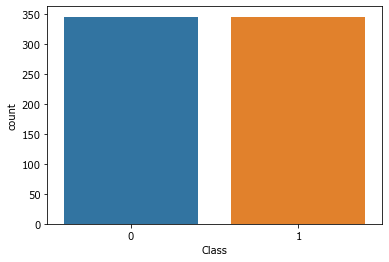

In [48]:
sns.countplot(x='Class', data = df)

In [51]:
# sns.pairplot(df)
corr = df.corr()
sns.heatmap(corr)

KeyboardInterrupt: 

In [ ]:
x_train = df[features]
y_train = df['Class']
y_train.value_counts()